In [ ]:
# importing modules
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Geography_Germany'] =df['Geography_Germany'].replace({'True': 1, 'False': 0})
df['Geography_Spain'] =df['Geography_Spain'].replace({'True': 1, 'False': 0})
df['Gender_Male'] =df['Gender_Male'].replace({'True': 1, 'False': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [ ]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis=1), df['Exited'], test_size=0.2, random_state=42)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 8ms/step - loss: 0.3208 - accuracy: 0.8691 - val_loss: 0.3451 - val_accuracy: 0.8575
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3206 - accuracy: 0.8669 - val_loss: 0.3458 - val_accuracy: 0.8575
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.8686 - val_loss: 0.3451 - val_accuracy: 0.8587
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8680 - val_loss: 0.3450 - val_accuracy: 0.8600
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8695 - val_loss: 0.3452 - val_accuracy: 0.8581
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8677 - val_loss: 0.3459 - val_accuracy: 0.8562
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8673 - val_loss: 0.3469 - val_accuracy: 0.8587

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.layers[0].get_weights()

[array([[ 0.07300994, -0.08922432, -0.5370767 ],
        [-1.4086444 ,  0.9778487 ,  0.37721747],
        [ 0.07979748, -0.08728285,  0.52298635],
        [-0.4444429 , -0.17956226, -0.43090448],
        [-0.27416742, -1.133235  ,  0.7264094 ],
        [-0.0204428 , -0.06264838,  0.5427038 ],
        [ 0.6378297 , -0.7547297 ,  0.671277  ],
        [ 0.04600794,  0.17027898,  0.18410286],
        [-0.5848266 ,  0.38511136, -0.5491671 ],
        [ 0.04754758,  0.12307281,  0.08372455],
        [ 0.39988068, -0.32793668, -0.17543595]], dtype=float32),
 array([ 0.75104344, -0.7242286 , -0.24013327], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

[array([[-1.8488483 ],
        [ 0.9980624 ],
        [-0.09567618]], dtype=float32),
 array([-0.6744615], dtype=float32)]

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_predict = np.where(y_log > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8625

<function matplotlib.pyplot.show(close=None, block=None)>

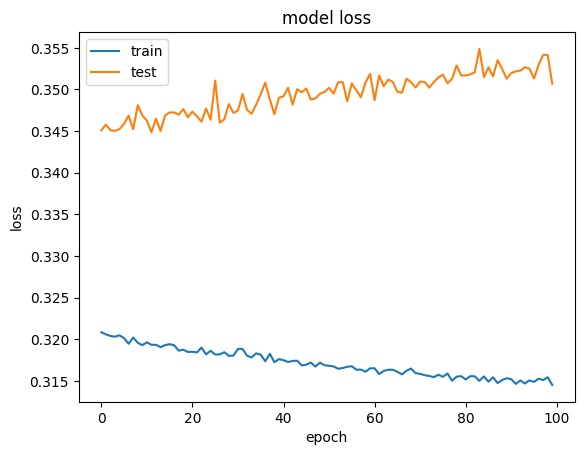

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
# Dog vs Cat Classifier
!kaggle datasets download -d moazeldsokyx/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats
License(s): CC0-1.0
 99% 809M/817M [00:10<00:00, 82.7MB/s]
100% 817M/817M [00:10<00:00, 79.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model2 = Sequential()
model2.add(model)
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 21137729 (80.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.trainable = False

In [ ]:
# generators
# divides data into small batches
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dataset/train",
    labels="inferred",
    label_mode="int", # for 0 and 1
    batch_size=32,
    image_size=(224, 224),# for similar sizes

  )
validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dataset/test",
    labels="inferred",
    label_mode="int", # for 0 and 1
    batch_size=32,
    image_size=(224, 224),# for similar sizes

  )

Found 20000 files belonging to 2 classes.
Found 12461 files belonging to 2 classes.


In [ ]:
# Display the first few rows of the DataFrame to inspect the data
print(train_df.head())

# Display data types of each column in the DataFrame
print(train_df.dtypes)

In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model2.fit(train_ds,epochs=1,validation_data=validation_ds)

Epoch 1/10
 25/625 [>.............................] - ETA: 2:54:54 - loss: 1.2805 - accuracy: 0.6762

In [ ]:
# create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1000) vs (None, 1)).


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dataset/validation",
    labels="inferred",
    label_mode="int", # for 0 and 1
    batch_size=32,
    image_size=(256, 256),# for similar sizes
  )

Found 5000 files belonging to 2 classes.


In [ ]:
model.predict(test_ds)

157/157 [==============================] - 9s 50ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
model.evaluate(test_ds)

157/157 [==============================] - 11s 61ms/step - loss: 158.8891 - accuracy: 0.7072


[158.88914489746094, 0.7071999907493591]

In [ ]:
import cv2


In [ ]:
img = cv2.imread('/content/Cat.jpg')

In [ ]:
img2 = cv2.imread('/content/Dog.jpg')

In [ ]:
img3 = cv2.imread('/content/cat2.jpg')

In [ ]:
img4 = cv2.imread('/content/Dogg.jpg')

In [ ]:
img3 = cv2.resize(img3,(256,256))
test_input3 = img3.reshape((1,256,256,3))

In [ ]:
img4 = cv2.resize(img4,(256,256))
test_input4 = img4.reshape((1,256,256,3))

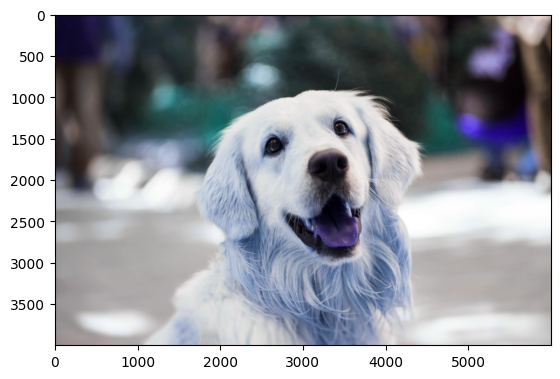

In [ ]:
plt.imshow(img2)

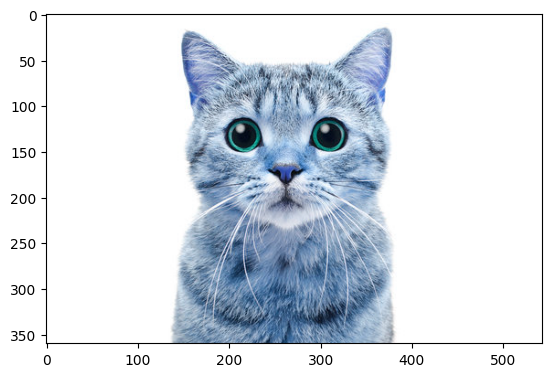

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(360, 543, 3)

In [ ]:
img = cv2.resize(img,(256,256))

In [ ]:
img2 = cv2.resize(img2,(256,256))

In [ ]:
test_input = img.reshape((1,256,256,3))

In [ ]:
test_input2 = img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input4)

1/1 [==============================] - 0s 64ms/step


array([[1.]], dtype=float32)

In [ ]:
model.predict(test_input3)

1/1 [==============================] - 0s 174ms/step


array([[1.]], dtype=float32)

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 505ms/step


array([[1.]], dtype=float32)